# 4: Phân tích Độ nhạy Quyền chọn (The Greeks)

**Mục tiêu**

*   Tính toán các chỉ số độ nhạy "Greeks" (Delta, Gamma, Vega, Theta, Rho) cho quyền chọn mua (Call) và quyền chọn bán (Put) kiểu châu Âu sử dụng các hàm đã xây dựng.
*   Trực quan hóa và phân tích cách giá trị của quyền chọn và các Greeks thay đổi khi các yếu tố thị trường chính (như giá tài sản cơ sở, độ biến động, thời gian đáo hạn) biến động.
*   Hiểu rõ hơn về ý nghĩa thực tiễn của từng Greek trong quản lý rủi ro và chiến lược giao dịch quyền chọn.

**Công cụ sử dụng:**
*   Các hàm tính Greeks từ module `core.black_scholes`.
*   Thư viện `matplotlib` và `seaborn` để trực quan hóa.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if '..' not in sys.path:
    sys.path.append('..')

from core.black_scholes import (
    european_call_price,
    european_put_price,
    get_all_greeks # Hàm này tiện lợi để lấy tất cả Greeks một lúc
)

sns.set_theme(style="whitegrid", palette="muted")

## I. Định nghĩa Tham số Cơ sở cho Phân tích Greeks

Để phân tích sự thay đổi của Greeks, chúng ta sẽ bắt đầu với một bộ tham số cơ sở cho quyền chọn. Sau đó, chúng ta sẽ thay đổi từng tham số một để quan sát ảnh hưởng của nó.

**Tham số cơ sở (Baseline Parameters):**
*   Loại quyền chọn: Call Option
*   Giá tài sản cơ sở ($S$): $100
*   Giá thực hiện ($K$): $100 (At-the-money)
*   Thời gian đến đáo hạn ($T$): 1 năm
*   Lãi suất phi rủi ro ($r$): 5% (0.05)
*   Độ biến động ($\sigma$): 20% (0.20)
*   Số ngày trong năm (dùng cho Theta hàng ngày): 365

In [2]:
# Tham số cơ sở
S_base = 100.0
K_base = 100.0
T_base_years = 1.0
r_base_annual = 0.05
sigma_base_annual = 0.20
option_type_base = "call"
days_in_year_for_theta = 365

# Tính giá quyền chọn cơ sở
call_price_base = european_call_price(
    S_base, K_base, T_base_years, r_base_annual, sigma_base_annual
)
put_price_base = european_put_price(
    S_base, K_base, T_base_years, r_base_annual, sigma_base_annual
)

# Tính các Greeks cơ sở cho Call Option
greeks_base_call = get_all_greeks(
    S_base, K_base, T_base_years, r_base_annual, sigma_base_annual,
    option_type_base, days_in_year_for_theta
)

# Tính các Greeks cơ sở cho Put Option
greeks_base_put = get_all_greeks(
    S_base, K_base, T_base_years, r_base_annual, sigma_base_annual,
    "put", days_in_year_for_theta # option_type là "put"
)

print("--- Giá trị với Tham số Cơ sở ---")
print("Giá Call Option: $", round(call_price_base, 4))
print("Giá Put Option: $", round(put_price_base, 4))

print("\n--- Greeks cho Call Option (cơ sở) ---")
for greek_name, greek_value in greeks_base_call.items():
    print(greek_name.capitalize(), ": ", round(greek_value, 6))

print("\n--- Greeks cho Put Option (cơ sở) ---")
for greek_name, greek_value in greeks_base_put.items():
    print(greek_name.capitalize(), ": ", round(greek_value, 6))

--- Giá trị với Tham số Cơ sở ---
Giá Call Option: $ 10.4506
Giá Put Option: $ 5.5735

--- Greeks cho Call Option (cơ sở) ---
Delta :  0.636831
Gamma :  0.018762
Vega :  0.37524
Theta :  -0.017573
Rho :  0.532325

--- Greeks cho Put Option (cơ sở) ---
Delta :  -0.363169
Gamma :  0.018762
Vega :  0.37524
Theta :  -0.004542
Rho :  -0.418905


## II. Phân tích Độ nhạy theo Giá Tài sản Cơ sở ($S$)

Chúng ta sẽ giữ các tham số $K, T, r, \sigma$ cố định và thay đổi $S$ để xem Delta và Gamma biến động như thế nào.

*   **Delta ($\Delta$):** Đo lường mức độ thay đổi của giá quyền chọn khi giá tài sản cơ sở thay đổi 1 đơn vị.
    *   Call Delta: $0 \le \Delta_{call} \le 1$
    *   Put Delta: $-1 \le \Delta_{put} \le 0$
*   **Gamma ($\Gamma$):** Đo lường mức độ thay đổi của Delta khi giá tài sản cơ sở thay đổi 1 đơn vị. Gamma lớn nhất khi quyền chọn at-the-money.

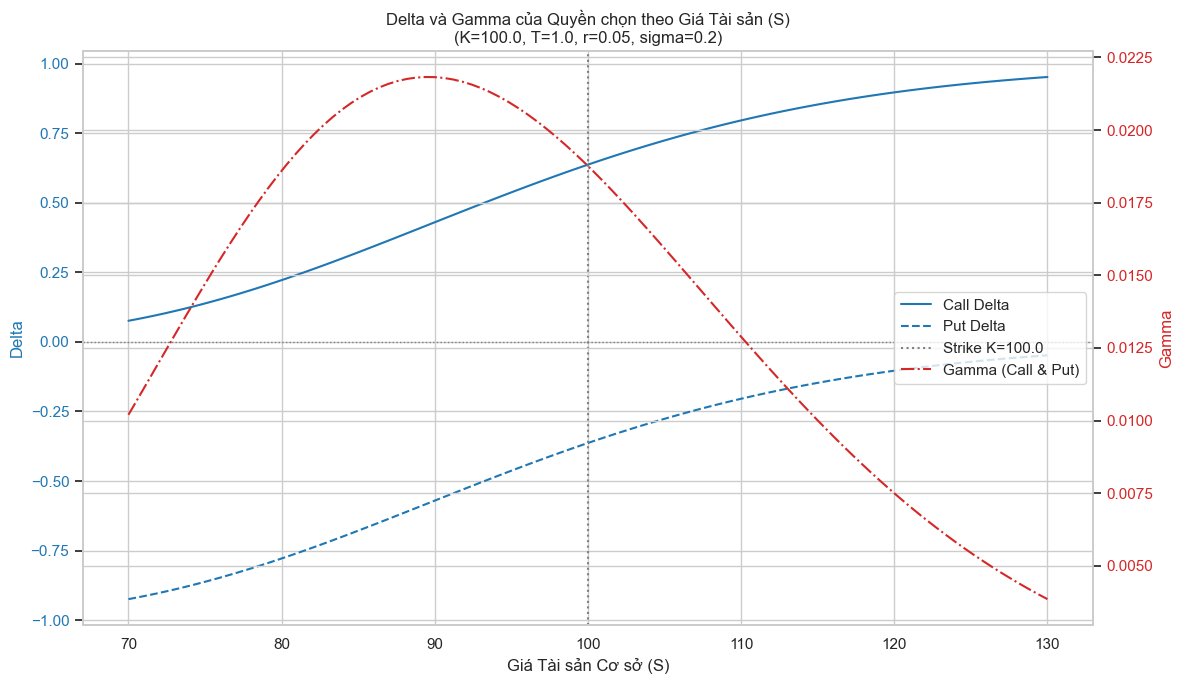

In [3]:
# Dải giá tài sản cơ sở (S) để phân tích
S_range = np.linspace(70, 130, 100) # Từ $70 đến $130, 100 điểm

# List để lưu trữ giá trị Greeks
call_deltas_vs_S = []
put_deltas_vs_S = []
gammas_vs_S = [] # Gamma giống nhau cho Call và Put

for s_val in S_range:
    greeks_call_temp = get_all_greeks(
        s_val, K_base, T_base_years, r_base_annual, sigma_base_annual, "call", days_in_year_for_theta
    )
    greeks_put_temp = get_all_greeks(
        s_val, K_base, T_base_years, r_base_annual, sigma_base_annual, "put", days_in_year_for_theta
    )
    call_deltas_vs_S.append(greeks_call_temp["delta"])
    put_deltas_vs_S.append(greeks_put_temp["delta"])
    gammas_vs_S.append(greeks_call_temp["gamma"]) # Hoặc greeks_put_temp["gamma"]

# Vẽ đồ thị
fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ Delta
color_delta = 'tab:blue'
ax1.set_xlabel("Giá Tài sản Cơ sở (S)")
ax1.set_ylabel("Delta", color=color_delta)
ax1.plot(S_range, call_deltas_vs_S, color=color_delta, linestyle='-', label="Call Delta")
ax1.plot(S_range, put_deltas_vs_S, color=color_delta, linestyle='--', label="Put Delta")
ax1.tick_params(axis='y', labelcolor=color_delta)
ax1.axhline(0, color='grey', linestyle=':', lw=1) # Đường 0 cho Delta
ax1.axvline(K_base, color='grey', linestyle=':', lw=1.5, label="Strike K=" + str(K_base))

# Tạo trục y thứ hai cho Gamma (vì Gamma có thang đo khác Delta)
ax2 = ax1.twinx()
color_gamma = 'tab:red'
ax2.set_ylabel("Gamma", color=color_gamma)
ax2.plot(S_range, gammas_vs_S, color=color_gamma, linestyle='-.', label="Gamma (Call & Put)")
ax2.tick_params(axis='y', labelcolor=color_gamma)

# Kết hợp legends từ cả hai trục
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.title("Delta và Gamma của Quyền chọn theo Giá Tài sản (S)\n(K={}, T={}, r={}, sigma={})".format(
    K_base, T_base_years, r_base_annual, sigma_base_annual))
fig.tight_layout() # Đảm bảo không bị cắt chữ
plt.show()

## III. Phân tích Vega ($\mathcal{V}$)

**Vega ($\mathcal{V}$):** Đo lường mức độ thay đổi của giá quyền chọn khi độ biến động ($\sigma$) thay đổi 1 điểm phần trăm. Vega lớn nhất khi quyền chọn at-the-money và có thời gian đáo hạn dài.

### 1. Vega theo Giá Tài sản Cơ sở ($S$) (giữ $\sigma$ cố định)

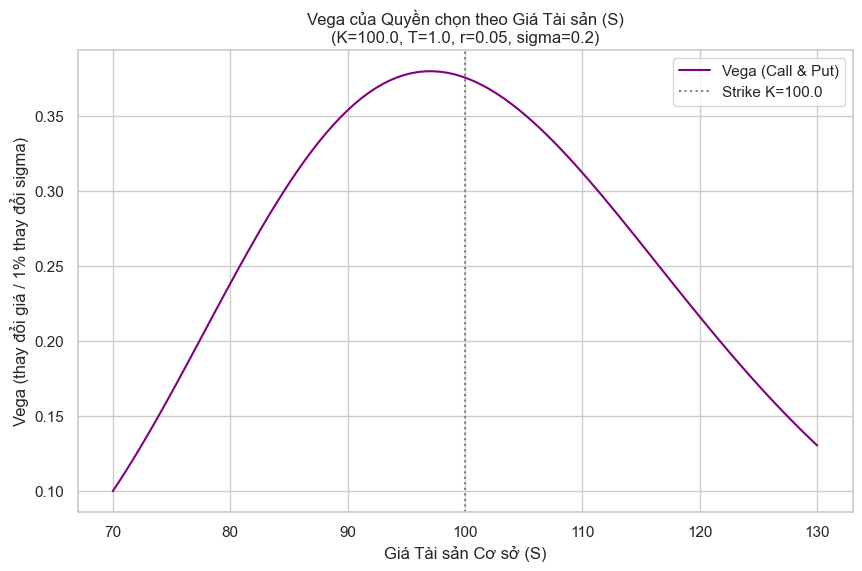

In [4]:
# Dải giá S đã có từ S_range

vegas_vs_S = [] # Vega giống nhau cho Call và Put

for s_val in S_range:
    greeks_temp = get_all_greeks(
        s_val, K_base, T_base_years, r_base_annual, sigma_base_annual, "call", days_in_year_for_theta
    )
    vegas_vs_S.append(greeks_temp["vega"])

plt.figure(figsize=(10, 6))
plt.plot(S_range, vegas_vs_S, color='purple', label="Vega (Call & Put)")
plt.axvline(K_base, color='grey', linestyle=':', lw=1.5, label="Strike K=" + str(K_base))
plt.title("Vega của Quyền chọn theo Giá Tài sản (S)\n(K={}, T={}, r={}, sigma={})".format(
    K_base, T_base_years, r_base_annual, sigma_base_annual))
plt.xlabel("Giá Tài sản Cơ sở (S)")
plt.ylabel("Vega (thay đổi giá / 1% thay đổi sigma)")
plt.legend()
plt.grid(True)
plt.show()

### 2. Vega theo Độ biến động ($\sigma$) (giữ $S$ cố định at-the-money)

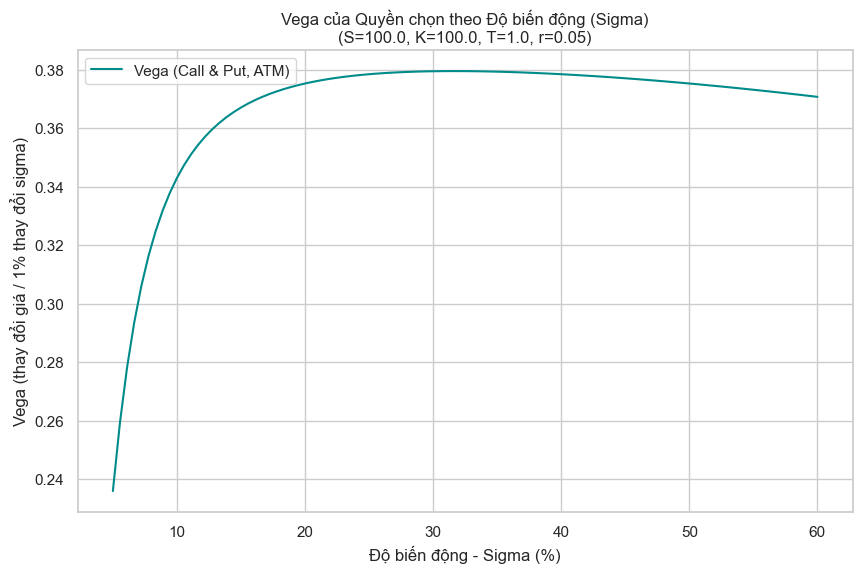

In [6]:
# Dải độ biến động (sigma) để phân tích
sigma_range = np.linspace(0.05, 0.60, 100) # Từ 5% đến 60%

vegas_vs_sigma = []

for sig_val in sigma_range:
    greeks_temp = get_all_greeks(
        S_base, K_base, T_base_years, r_base_annual, sig_val, "call", days_in_year_for_theta
    )
    vegas_vs_sigma.append(greeks_temp["vega"])

plt.figure(figsize=(10, 6))
plt.plot(sigma_range * 100, vegas_vs_sigma, color='darkcyan', label="Vega (Call & Put, ATM)") # sigma_range * 100 để hiển thị %
plt.title("Vega của Quyền chọn theo Độ biến động (Sigma)\n(S={}, K={}, T={}, r={})".format(
    S_base, K_base, T_base_years, r_base_annual))
plt.xlabel("Độ biến động - Sigma (%)")
plt.ylabel("Vega (thay đổi giá / 1% thay đổi sigma)")
plt.legend()
plt.grid(True)
plt.show()

## IV. Phân tích Theta ($\Theta$) - Suy giảm Giá trị do Thời gian

**Theta ($\Theta$):** Đo lường mức độ thay đổi của giá quyền chọn khi thời gian trôi qua 1 ngày (time decay). Theta thường âm cho người mua quyền chọn. Sự suy giảm giá trị do thời gian tăng tốc khi quyền chọn gần đến ngày đáo hạn, đặc biệt với các quyền chọn at-the-money.

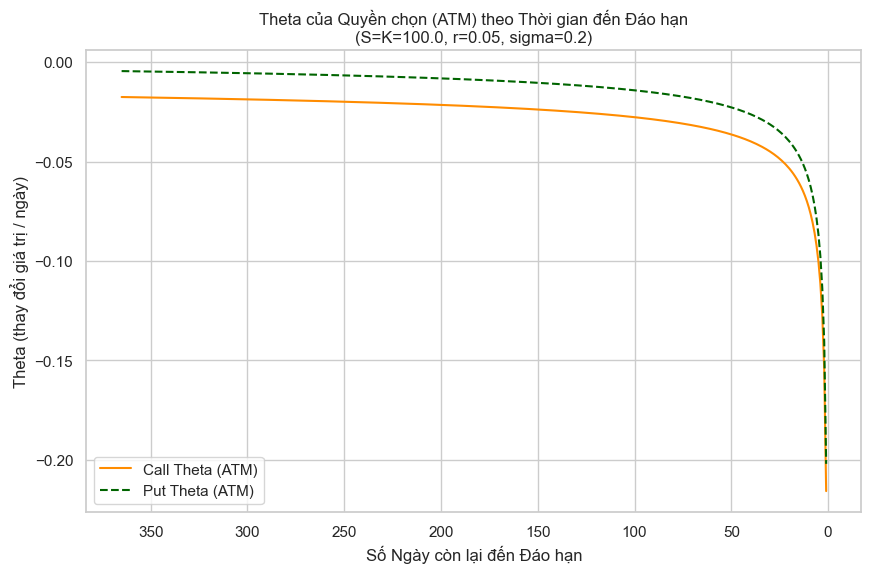

In [7]:
# Dải thời gian đến đáo hạn (T) để phân tích, tính bằng ngày
days_to_maturity_range = np.linspace(365, 1, 365) # Từ 365 ngày giảm về 1 ngày
T_years_range_for_theta = days_to_maturity_range / days_in_year_for_theta

# Giữ S=K (At-the-money) để xem Theta rõ nhất
S_for_theta_analysis = K_base

call_thetas_vs_T = []
put_thetas_vs_T = []

for t_val_years in T_years_range_for_theta:
    greeks_call_temp = get_all_greeks(
        S_for_theta_analysis, K_base, t_val_years, r_base_annual, sigma_base_annual, "call", days_in_year_for_theta
    )
    greeks_put_temp = get_all_greeks(
        S_for_theta_analysis, K_base, t_val_years, r_base_annual, sigma_base_annual, "put", days_in_year_for_theta
    )
    call_thetas_vs_T.append(greeks_call_temp["theta"])
    put_thetas_vs_T.append(greeks_put_temp["theta"])

plt.figure(figsize=(10, 6))
plt.plot(days_to_maturity_range, call_thetas_vs_T, label="Call Theta (ATM)", color='darkorange')
plt.plot(days_to_maturity_range, put_thetas_vs_T, label="Put Theta (ATM)", color='darkgreen', linestyle='--')
plt.gca().invert_xaxis() # Đảo ngược trục X để thời gian đi từ "còn nhiều" về "còn ít"
plt.title("Theta của Quyền chọn (ATM) theo Thời gian đến Đáo hạn\n(S=K={}, r={}, sigma={})".format(
    S_for_theta_analysis, r_base_annual, sigma_base_annual))
plt.xlabel("Số Ngày còn lại đến Đáo hạn")
plt.ylabel("Theta (thay đổi giá trị / ngày)")
plt.legend()
plt.grid(True)
plt.show()

## V. Phân tích Rho ($\rho$) - Độ nhạy với Lãi suất

**Rho ($\rho$):** Đo lường mức độ thay đổi của giá quyền chọn khi lãi suất phi rủi ro ($r$) thay đổi 1 điểm phần trăm. Call option thường có Rho dương, Put option thường có Rho âm.

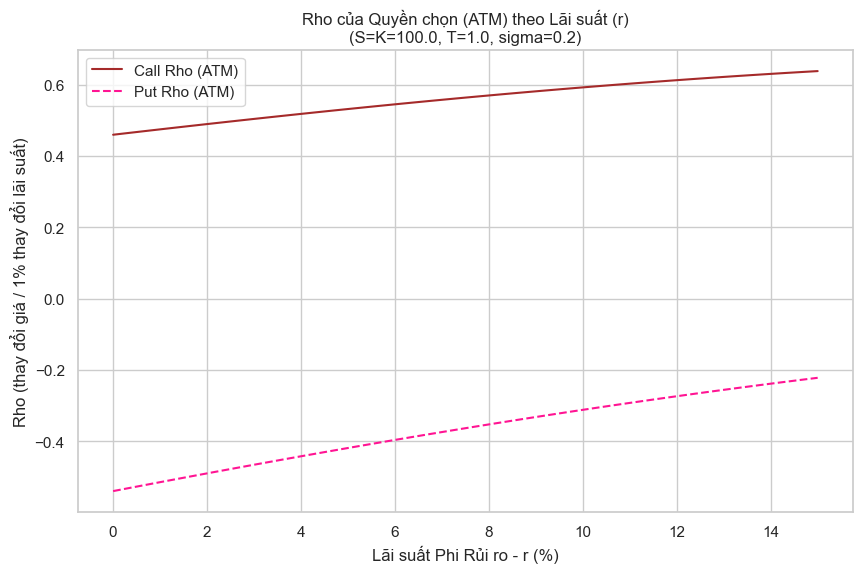

In [8]:
# Dải lãi suất (r) để phân tích
r_rate_range = np.linspace(0.00, 0.15, 100) # Từ 0% đến 15%

# Giữ S=K (At-the-money)
S_for_rho_analysis = K_base

call_rhos_vs_r = []
put_rhos_vs_r = []

for r_val_annual in r_rate_range:
    greeks_call_temp = get_all_greeks(
        S_for_rho_analysis, K_base, T_base_years, r_val_annual, sigma_base_annual, "call", days_in_year_for_theta
    )
    greeks_put_temp = get_all_greeks(
        S_for_rho_analysis, K_base, T_base_years, r_val_annual, sigma_base_annual, "put", days_in_year_for_theta
    )
    call_rhos_vs_r.append(greeks_call_temp["rho"])
    put_rhos_vs_r.append(greeks_put_temp["rho"])

plt.figure(figsize=(10, 6))
plt.plot(r_rate_range * 100, call_rhos_vs_r, label="Call Rho (ATM)", color='brown')
plt.plot(r_rate_range * 100, put_rhos_vs_r, label="Put Rho (ATM)", color='deeppink', linestyle='--')
plt.title("Rho của Quyền chọn (ATM) theo Lãi suất (r)\n(S=K={}, T={}, sigma={})".format(
    S_for_rho_analysis, T_base_years, sigma_base_annual))
plt.xlabel("Lãi suất Phi Rủi ro - r (%)")
plt.ylabel("Rho (thay đổi giá / 1% thay đổi lãi suất)")
plt.legend()
plt.grid(True)
plt.show()